In [1]:
mkdir -p ./shape

In [2]:
ls

shape/  wrs-path-row-example-rwanda.ipynb


In [3]:
!ls

shape  wrs-path-row-example-rwanda.ipynb


In [4]:
#! wget https://landsat.usgs.gov/sites/default/files/documents/WRS2_descending.zip -O .//shape/WRS2_descending.zip

--2020-07-11 07:15:25--  https://landsat.usgs.gov/sites/default/files/documents/WRS2_descending.zip
Resolving landsat.usgs.gov (landsat.usgs.gov)... 152.61.136.10, 2001:49c8:4000:122c::10
Connecting to landsat.usgs.gov (landsat.usgs.gov)|152.61.136.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5268095 (5.0M) [application/zip]
Saving to: ‘.//shape/WRS2_descending.zip’

.//shape/WRS2_desce 100%[===================>]   5.02M  4.23MB/s    in 1.2s    

2020-07-11 07:15:26 (4.23 MB/s) - ‘.//shape/WRS2_descending.zip’ saved [5268095/5268095]



In [5]:
#!unzip ./shape/WRS2_descending.zip
#! conda install -y unzip

Solving environment: done

## Package Plan ##

  environment location: /srv/conda/envs/pangeo

  added / updated specs:
    - unzip


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    unzip-6.0                  |       h516909a_1         173 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         470 KB

The following NEW packages will be INSTALLED:

  unzip              conda-forge/linux-64::unzip-6.0-h516909a_1

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.1-hecc5488_0 --> 2020.6.20-hecda079_0
  certifi                         2020.4.5.1-py37hc8dfbb8_0 --> 2020.6.20-py37hc8dfbb8_0



certifi-2020.6.20    | 151 

In [6]:
! (cd shape; unzip *.zip)

Archive:  WRS2_descending.zip
replace WRS2_descending.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [7]:
! echo .zip > .gitignore
! echo shape >> .gitginore

In [8]:
%matplotlib inline

import pandas as pd
import geopandas

pd.options.display.max_rows = 10

In [9]:
! ls ./shape ; pwd

WRS2_descending.cpg  WRS2_descending.sbn  WRS2_descending.shx
WRS2_descending.dbf  WRS2_descending.sbx  WRS2_descending.xml
WRS2_descending.prj  WRS2_descending.shp  WRS2_descending.zip
/home/jovyan/opt/pangeo-et/00-notebooks/10-folium-geopandas-shapefiles


In [10]:
wrs_things = geopandas.read_file("shape/WRS2_descending.shp")

In [11]:
wrs_things.head()

,AREA,PERIMETER,PR_,PR_ID,RINGS_OK,RINGS_NOK,PATH,ROW,MODE,SEQUENCE,WRSPR,PR,ACQDayL7,ACQDayL8,geometry
0,15.74326,26.98611,1.0,1.0,1,0,13,1,D,2233,013001,013001,1,9,"POLYGON ((-10.80341 80.98880, -8.97407 80.3420..."
1,14.55366,25.84254,2.0,2.0,1,0,13,2,D,2234,013002,013002,1,9,"POLYGON ((-29.24250 80.18681, -29.29593 80.198..."
2,13.37247,24.20303,3.0,3.0,1,0,13,3,D,2235,013003,013003,1,9,"POLYGON ((-24.04206 79.12261, -23.78294 79.063..."
3,12.26691,22.40265,4.0,4.0,1,0,13,4,D,2236,013004,013004,1,9,"POLYGON ((-36.66813 77.46094, -40.05219 78.098..."
4,11.26511,20.64284,5.0,5.0,1,0,13,5,D,2237,013005,013005,1,9,"POLYGON ((-44.11210 76.93656, -44.12470 76.938..."


In [12]:
mywrs = wrs_things[['PATH', 'ROW', 'geometry']]

In [13]:
mywrs.head()

,PATH,ROW,geometry
0,13,1,"POLYGON ((-10.80341 80.98880, -8.97407 80.3420..."
1,13,2,"POLYGON ((-29.24250 80.18681, -29.29593 80.198..."
2,13,3,"POLYGON ((-24.04206 79.12261, -23.78294 79.063..."
3,13,4,"POLYGON ((-36.66813 77.46094, -40.05219 78.098..."
4,13,5,"POLYGON ((-44.11210 76.93656, -44.12470 76.938..."


In [14]:
wrs = mywrs[(mywrs['PATH'] >= 170) & (mywrs['PATH'] <= 173) & (mywrs['ROW'] >= 60) & (mywrs['ROW'] <= 63)]

In [15]:
wrs.head()

,PATH,ROW,geometry
3159,173,60,"POLYGON ((30.61694 0.56617, 30.32597 -0.80514,..."
3160,173,61,"POLYGON ((30.00346 -2.32697, 28.35734 -2.08786..."
3161,173,62,"POLYGON ((29.69705 -3.77356, 28.04880 -3.53415..."
3162,173,63,"POLYGON ((29.39043 -5.22012, 27.73920 -4.98025..."
6755,171,60,"POLYGON ((33.40015 -0.88038, 31.75500 -0.64141..."


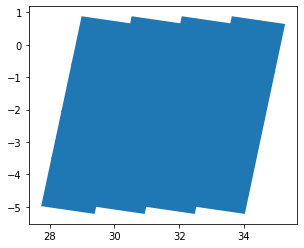

In [16]:
wrs.plot()

In [17]:
import folium
rwanda_map = folium.Map(location=[-1.0, 32.0],
                   tiles='Mapbox Bright', zoom_start=7)

In [18]:
p172061 = wrs[(wrs['PATH']==172) & (wrs['ROW']==61)]

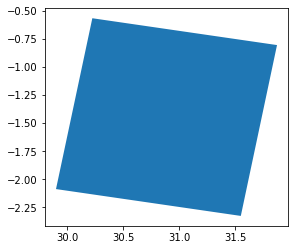

In [19]:
p172061.plot()

In [20]:
p172061['geometry']

19404    POLYGON ((31.54856 -2.32697, 29.90240 -2.08785...
Name: geometry, dtype: geometry

In [21]:
crs = {'init': 'epsg:4326'}
poly = geopandas.GeoDataFrame(index=[0], crs=crs, geometry=p172061['geometry'])

/srv/conda/envs/pangeo/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [22]:
my_useful_geojson = geopandas.GeoSeries(p172061['geometry']).to_json()
my_useful_geojson

'{"type": "FeatureCollection", "features": [{"id": "19404", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[31.548555712158997, -2.3269735666678293], [29.9024, -2.08785], [29.91840452349767, -2.0125906571039205], [30.21113228359267, -0.6360736445607913], [30.226, -0.56616], [31.87106776007167, -0.8051353165776722], [31.8711, -0.80514], [31.5486, -2.32698], [31.548555712158997, -2.3269735666678293]]]}, "bbox": [29.9024, -2.32698, 31.8711, -0.56616]}], "bbox": [29.9024, -2.32698, 31.8711, -0.56616]}'

In [23]:
folium.GeoJson(my_useful_geojson).add_to(rwanda_map)

In [24]:
rwanda_map

In [25]:
import folium
rwanda_map = folium.Map(location=[-1.0, 32.0],
                   tiles='OpenStreetMap', zoom_start=7)

In [26]:
rwanda_map

In [27]:
folium.GeoJson(my_useful_geojson).add_to(rwanda_map)

In [28]:
rwanda_map

In [29]:
rwanda_map = folium.Map(location=[-1.0, 32.0],
                  zoom_start=7, tiles=" http://mt1.google.com/vt/lyrs=y&z={z}&x={x}&y={y}", attr="Google")

In [66]:
#style_function = lambda x: {'fillColor': 'blue'} 
#folium.GeoJson(my_useful_geojson, style_function=style_function).add_to(rwanda_map)
folium.GeoJson(my_useful_geojson).add_to(rwanda_map)

In [67]:
rwanda_map

In [35]:
help(folium.GeoJson)

Help on class GeoJson in module folium.features:

class GeoJson(folium.map.Layer)
 |  GeoJson(data, style_function=None, highlight_function=None, name=None, overlay=True, control=True, show=True, smooth_factor=None, tooltip=None, embed=True, popup=None)
 |  
 |  Creates a GeoJson object for plotting into a Map.
 |  
 |  Parameters
 |  ----------
 |  data: file, dict or str.
 |      The GeoJSON data you want to plot.
 |      * If file, then data will be read in the file and fully
 |      embedded in Leaflet's JavaScript.
 |      * If dict, then data will be converted to JSON and embedded
 |      in the JavaScript.
 |      * If str, then data will be passed to the JavaScript as-is.
 |  style_function: function, default None
 |      Function mapping a GeoJson Feature to a style dict.
 |  highlight_function: function, default None
 |      Function mapping a GeoJson Feature to a style dict for mouse events.
 |  name : string, default None
 |      The name of the Layer, as it will appear in 

In [70]:
rwanda_map = folium.Map(location=[-1.0, 32.0],
                   tiles='OpenStreetMap', zoom_start=7)
style_function = lambda x: {'fillColor': 'red', 'color': 'green'} 
folium.GeoJson(my_useful_geojson, style_function=style_function).add_to(rwanda_map)

rwanda_map

In [71]:
help(folium.Map)

Help on class Map in module folium.folium:

class Map(branca.element.MacroElement)
 |  Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', attr=None, min_zoom=0, max_zoom=18, zoom_start=10, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=False, crs='EPSG3857', control_scale=False, prefer_canvas=False, no_touch=False, disable_3d=False, png_enabled=False, zoom_control=True, **kwargs)
 |  
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Must pass API key)
 |      - "Ma

In [75]:

rwanda_map = folium.Map(location=[-1.0, 32.0],
                  zoom_start=7, tiles='Stamen Terrain',
                    attr='Mapbox attribution')

rwanda_map

Can choose from this list of built-in tiles:

    ”OpenStreetMap”
    ”Stamen Terrain”, “Stamen Toner”, “Stamen Watercolor”
    ”CartoDB positron”, “CartoDB dark_matter”
    ”Mapbox Bright”, “Mapbox Control Room” (Limited zoom)
    ”Cloudmade” (Must pass API key)
    ”Mapbox” (Must pass API key)

In [78]:
rwanda_map = folium.Map(location=[-1.0, 32.0],
                  zoom_start=7, tiles='CartoDB positron',
                    attr='Mapbox attribution')

rwanda_map

In [81]:
my_useful_geojson



'{"type": "FeatureCollection", "features": [{"id": "19404", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[31.548555712158997, -2.3269735666678293], [29.9024, -2.08785], [29.91840452349767, -2.0125906571039205], [30.21113228359267, -0.6360736445607913], [30.226, -0.56616], [31.87106776007167, -0.8051353165776722], [31.8711, -0.80514], [31.5486, -2.32698], [31.548555712158997, -2.3269735666678293]]]}, "bbox": [29.9024, -2.32698, 31.8711, -0.56616]}], "bbox": [29.9024, -2.32698, 31.8711, -0.56616]}'

In [94]:
rwanda_map = folium.Map(location=[-1.0, 32.0],
                   tiles='OpenStreetMap', zoom_start=7)
style_function = lambda x: {'fillColor': 'red', 'color': 'green'} 
gjson = folium.GeoJson(my_useful_geojson, style_function=style_function, tooltip='Tony').add_to(rwanda_map)
#folium.features.GeoJsonPopup(fields=["id",],labels=True, class_name='tony' ).add_to(gjson)

rwanda_map

In [83]:
help(folium.features.GeoJsonPopup)

Help on class GeoJsonPopup in module folium.features:

class GeoJsonPopup(GeoJsonDetail)
 |  GeoJsonPopup(fields=None, aliases=None, labels=True, style='margin: auto;', class_name='foliumpopup', localize=True, **kwargs)
 |  
 |  Create a popup feature to bind to each element of a GeoJson layer based on
 |  its attributes.
 |  
 |  Parameters
 |  ----------
 |  fields: list or tuple.
 |      Labels of GeoJson/TopoJson 'properties' or GeoPandas GeoDataFrame
 |      columns you'd like to display.
 |  aliases: list/tuple of strings, same length/order as fields, default None.
 |      Optional aliases you'd like to display in the tooltip as field name
 |      instead of the keys of `fields`.
 |  labels: bool, default True.
 |      Set to False to disable displaying the field names or aliases.
 |  localize: bool, default False.
 |      This will use JavaScript's .toLocaleString() to format 'clean' values
 |      as strings for the user's location; i.e. 1,000,000.00 comma separators,
 |      f

In [92]:
help (folium.GeoJson)

Help on class GeoJson in module folium.features:

class GeoJson(folium.map.Layer)
 |  GeoJson(data, style_function=None, highlight_function=None, name=None, overlay=True, control=True, show=True, smooth_factor=None, tooltip=None, embed=True, popup=None)
 |  
 |  Creates a GeoJson object for plotting into a Map.
 |  
 |  Parameters
 |  ----------
 |  data: file, dict or str.
 |      The GeoJSON data you want to plot.
 |      * If file, then data will be read in the file and fully
 |      embedded in Leaflet's JavaScript.
 |      * If dict, then data will be converted to JSON and embedded
 |      in the JavaScript.
 |      * If str, then data will be passed to the JavaScript as-is.
 |  style_function: function, default None
 |      Function mapping a GeoJson Feature to a style dict.
 |  highlight_function: function, default None
 |      Function mapping a GeoJson Feature to a style dict for mouse events.
 |  name : string, default None
 |      The name of the Layer, as it will appear in 